In [821]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [822]:
train = pd.read_csv('analytics_vidhya/train.csv')
test = pd.read_csv('analytics_vidhya/test.csv')

In [823]:
print(train.shape)
print(test.shape)

(26496, 8)
(8568, 7)


In [824]:
train.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


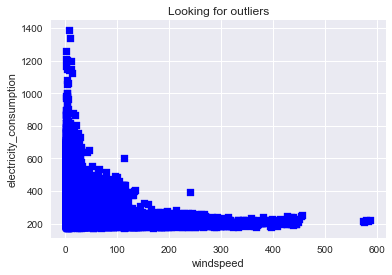

In [825]:
plt.scatter(train.windspeed, train.electricity_consumption, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("windspeed")
plt.ylabel("electricity_consumption")
plt.show()

In [826]:
# train.ix[~((train.GrLivArea>4000) & (train.SalePrice<300000))]
train = train.ix[~((train.windspeed>200) & (train.electricity_consumption>380))]
train = train.ix[~((train.windspeed>100) & (train.electricity_consumption>580))]
train = train.ix[~((train.windspeed>500))]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from 

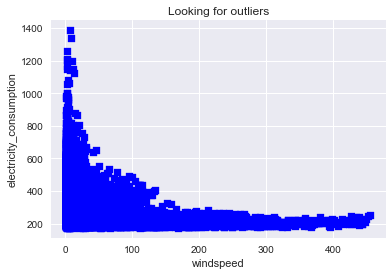

In [827]:
plt.scatter(train.windspeed, train.electricity_consumption, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("windspeed")
plt.ylabel("electricity_consumption")
plt.show()

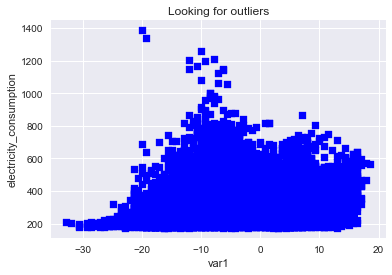

In [828]:
plt.scatter(train.var1, train.electricity_consumption, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("var1")
plt.ylabel("electricity_consumption")
plt.show()

In [829]:
#train.ix[((train.electricity_consumption>1300))]
train = train.ix[~((train.electricity_consumption>1300))]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


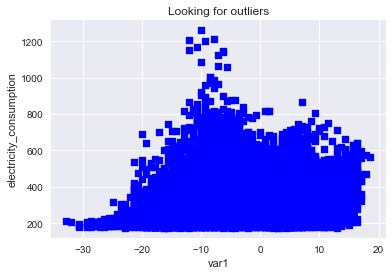

In [830]:
plt.scatter(train.var1, train.electricity_consumption, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("var1")
plt.ylabel("electricity_consumption")
plt.show()

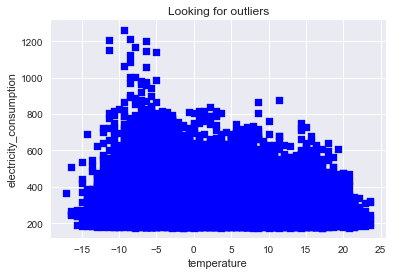

In [831]:
plt.scatter(train.temperature, train.electricity_consumption, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("temperature")
plt.ylabel("electricity_consumption")
plt.show()

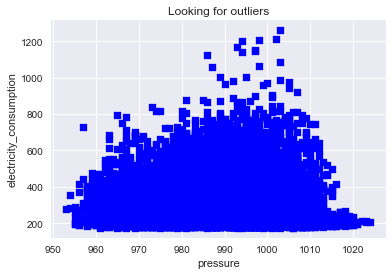

In [832]:
plt.scatter(train.pressure, train.electricity_consumption, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("pressure")
plt.ylabel("electricity_consumption")
plt.show()

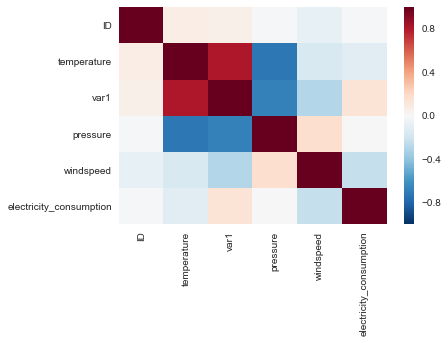

In [833]:
sns.heatmap(train.corr())

In [834]:
train.columns

Index([u'ID', u'datetime', u'temperature', u'var1', u'pressure', u'windspeed',
       u'var2', u'electricity_consumption'],
      dtype='object')

In [835]:
train.var2.unique()

array(['A', 'B', 'C'], dtype=object)

In [836]:
train.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [837]:
label = train.electricity_consumption
train = train.drop(['electricity_consumption'],axis=1)
print(train.columns)

Index([u'ID', u'datetime', u'temperature', u'var1', u'pressure', u'windspeed',
       u'var2'],
      dtype='object')


In [838]:
train = train.drop(['ID'],axis=1)
print(train.columns)

Index([u'datetime', u'temperature', u'var1', u'pressure', u'windspeed',
       u'var2'],
      dtype='object')


In [839]:
train.var2 = train.var2.replace(["A", "B", "C"],[1,2,3])
train["var2"] = train.var2 
print(train.var2.unique())

[1 2 3]


In [840]:
from datetime import datetime
def month_from_date(date):
  dmyyyy = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  return int(datetime.strftime(dmyyyy, '%m'))
def hour_from_date(date):
  dmyyyy = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  return int(datetime.strftime(dmyyyy, '%H'))
def year_from_date(date):
  dmyyyy = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  return int(datetime.strftime(dmyyyy, '%Y'))
month_of = train['datetime'].apply(month_from_date)
hour_of = train['datetime'].apply(hour_from_date)
year_of = train['datetime'].apply(year_from_date)
# print(hour_of)
train['month_of'] = month_of;
train['hour_of'] = hour_of;
train['year_of'] = year_of;

In [841]:
from dateutil import parser
def day_from_date(date):
    return parser.parse(date).strftime("%a")
day_of = train['datetime'].apply(day_from_date)
train['day_of'] = day_of;
print(train['day_of'].unique())

['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun']


In [842]:
train.day_of = train.day_of.replace(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],[1,2,3,4,5,6,7])
train["day_of"] = train.day_of 
print(train.day_of.unique())

[1 2 3 4 5 6 7]


In [843]:
print(train.columns)

Index([u'datetime', u'temperature', u'var1', u'pressure', u'windspeed',
       u'var2', u'month_of', u'hour_of', u'year_of', u'day_of'],
      dtype='object')


In [844]:
train = train.drop(['datetime'],axis=1)
print(train.columns)

Index([u'temperature', u'var1', u'pressure', u'windspeed', u'var2',
       u'month_of', u'hour_of', u'year_of', u'day_of'],
      dtype='object')


In [845]:
train = train.drop(['var2'],axis=1)
print(train.columns)

Index([u'temperature', u'var1', u'pressure', u'windspeed', u'month_of',
       u'hour_of', u'year_of', u'day_of'],
      dtype='object')


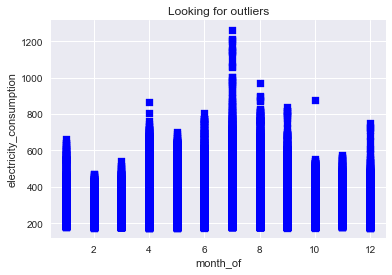

In [807]:
plt.scatter(train.month_of, label, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("month_of")
plt.ylabel("electricity_consumption")
plt.show()

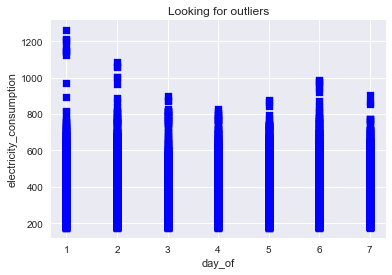

In [763]:
plt.scatter(train.day_of, label, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("day_of")
plt.ylabel("electricity_consumption")
plt.show()

In [525]:

# train = train.drop(['temperature'],axis=1)
# print(train.columns)

Index([u'var1', u'pressure', u'windspeed', u'var2', u'month_of', u'hour_of',
       u'year_of', u'day_of'],
      dtype='object')


In [846]:
# from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor(random_state=0)      
# clf = clf.fit(train,label)

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import RFE
# # Create the RFE object and rank each pixel
# clf_rf_3 = RandomForestRegressor()      
# clf = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
# clf = clf.fit(train, label)


# from sklearn import datasets, linear_model
# clf = linear_model.LinearRegression()
# clf = clf.fit(train, label)



In [847]:
test.describe()

,ID,temperature,var1,pressure,windspeed
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,17766.525210,5.112757,-1.726401,986.329599,24.176398
std,10117.296415,8.606167,10.345034,12.148517,49.651535
min,552.000000,-17.900000,-26.400000,954.000000,1.075000
25%,9317.750000,-2.100000,-10.000000,977.000000,3.155000
50%,18083.500000,5.700000,-2.100000,987.000000,6.295000
75%,26297.250000,12.100000,7.900000,995.000000,21.907500
max,35063.000000,25.700000,17.900000,1023.000000,491.255000


In [848]:
new_test = test.drop(['ID'],axis=1)
print(new_test.columns)

Index([u'datetime', u'temperature', u'var1', u'pressure', u'windspeed',
       u'var2'],
      dtype='object')


In [849]:
new_test.var2 = new_test.var2.replace(["A", "B", "C"],[1,2,3])
new_test["var2"] = new_test.var2 
print(new_test.var2.unique())

[1 2 3]


In [850]:
from datetime import datetime
def month_from_date(date):
  dmyyyy = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  return int(datetime.strftime(dmyyyy, '%m'))
def hour_from_date(date):
  dmyyyy = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  return int(datetime.strftime(dmyyyy, '%H'))
def year_from_date(date):
  dmyyyy = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
  return int(datetime.strftime(dmyyyy, '%Y'))

month_of = new_test['datetime'].apply(month_from_date)
hour_of = new_test['datetime'].apply(hour_from_date)
year_of = new_test['datetime'].apply(year_from_date)

# print(hour_of)
new_test['month_of'] = month_of;
new_test['hour_of'] = hour_of;
new_test['year_of'] = year_of;
# print(new_test.columns)

In [851]:
def day_from_date(date):
    return parser.parse(date).strftime("%a")
day_of = new_test['datetime'].apply(day_from_date)
new_test['day_of'] = day_of;
print(new_test['day_of'].unique())

['Wed' 'Thu' 'Fri' 'Sat' 'Sun' 'Mon' 'Tue']


In [852]:
new_test.day_of = new_test.day_of.replace(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],[1,2,3,4,5,6,7])
new_test["day_of"] = new_test.day_of 
print(new_test.day_of.unique())

[3 4 5 6 7 1 2]


In [853]:
new_test = new_test.drop(['datetime'],axis=1)
print(new_test.columns)

Index([u'temperature', u'var1', u'pressure', u'windspeed', u'var2',
       u'month_of', u'hour_of', u'year_of', u'day_of'],
      dtype='object')


In [854]:
new_test = new_test.drop(['var2'],axis=1)
print(new_test.columns)

Index([u'temperature', u'var1', u'pressure', u'windspeed', u'month_of',
       u'hour_of', u'year_of', u'day_of'],
      dtype='object')


In [534]:

# new_test = new_test.drop(['temperature'],axis=1)
# print(new_test.columns)

Index([u'var1', u'pressure', u'windspeed', u'var2', u'month_of', u'hour_of',
       u'year_of', u'day_of'],
      dtype='object')


In [855]:
test_label = clf.predict(new_test)
print('ok')

ok


In [856]:
print(test_label)
new_test['electricity_consumption'] = test_label
new_test['ID'] = test['ID']

[ 215.78937268  184.57617608  218.87753912 ...,  212.33029477  206.35647081
  216.45443806]


In [857]:
new_pd_frame = new_test[['ID','electricity_consumption']]

In [858]:
new_pd_frame.to_csv('sample_submission_av_24.csv', index=False)